# NGC 2 Week 2 phase 1

## 1. Perkenalan

Nama : Harun

Batch : RMT -35

Objective :  Melakukan sebuah analisis prediksi model dengan menggunakan machine learning untuk orang yang terkena penyakit jantung. Hal ini dilakukan untuk dapat mempermudah para medis dalam menangani banyak pasien dengan itu model ini sangat diperlukan.

## 2. Promblem Statement

### - Metode SMART

Specific: Membuat Model learning untuk memprediksi seseorang mempunyai kemungkinan terserang serangan jantung.

Measurable:
Sebelum menentukan Measurement kita simulasi dalam Confusion Matriks supaya lebih paham. 

Confusion Matrix 

Positif = Positif Penyakit Jantung
 
Negatif = Negatif Penyakit Jantung

|                | Predicted Positive  | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positif             | False Negatif                 |
| **Actual Negative** | False Positif                  | True negatif                |

|
(Mana yang lebih bahaya)

FP = model prediksi sakit ternyata kondisi orang adalah sehat. Worst case scenario (Orang mungkin keluar biaya dan ada kemungkinan perubahan hidup sehat).
FN = model prediksi sehat ternyata kondisi orang adalah sakit. Worst case scenario(Orang akan menganggap dia sehat dan melanjutkan gaya hidup tetap tidak sehat selanjutnya kemungkinan bisa menjadi serangan jantung mendadak dan kematian ).
Machine Learning ini akan diuji dengan metriks yang meminimalisir False Negatif maka metriks yang cocok adalah recall (TP / TP + FN). Machine learning akan diuji dengan matriks recall dengna recall yang mendekati 1.  


Achievable: Dengan kepemilikan dataset serta tim pendukung seperti tim data dan tim kesehatan yang akan selalu monitoring kita yakin ML ini akan bisa tercapai.

Relevant:
ML ini akan digunakan cardiologist untuk optimalisasi pekerjaan mereka dengan adanya ini maka cardiologist tidak perlu melakukan pembacaan awal karena biasanya pembacaan adalah hal repetitif, waktu akan difokuskan untuk merawat pasien dan mengurangi hal hal repetitif 

Time-bound:
Model akan diterapkan dan melakukan prediksi selama 3 bulan.

### - Problem Statement

Membuat machine learning untuk memprediksi pasien yang mempunyai kemungkinan serangan penyakit jantung dengan matriks recall yang mendekati 1, kepemilikan data set dan tim tertentu akan membuat ML ini bisa tercapai  dengan adanya model ini maka kita bisa optimasi kerja dari dokter jantung pengerjaan akan dilakukan dalam waktu 3 bulan 

## 3. Import Libraries

In [17]:
# Untuk dasar
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kendalltau

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Algoritma
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Untuk Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Untuk Saving Model
import pickle

## 4. Data Loading

In [2]:
# Read data
df_ori = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/heart-attack-possibility.csv')

In [3]:
# Duplicate data original
df = df_ori.copy()

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1


---

Dataset Desciription

Dataset Name : `heart-attack-possibility.csv`

Description : Dataset ini berisi data rekam medis beberapa orang baik yang terkena serangan jantung maupun bukan disuatu rumah sakit.

| Column | Description |
| --- | --- |
| `age` | Usia Pasien (dalam tahun) |
| `sex` | Jenis kelamin Pasien |
| `cp` | Jenis nyeri dada <br><br> `0` = Typical angina <br> `1` = Atypical angina <br> `2` = Non-anginal pain <br> `3` = Asymptomatic |
| `trestbps` | Tekanan darah saat istirahat (dalam mm Hg saat masuk rumah sakit) |
| `chol` | Kolesterol serum (dalam mg/dl)    |
| `fbs` | Apakah gula darah puasa > 120 mg/dl? <br><br> `1` = Yes <br> `0` = No |
| `restecg` | Hasil elektrokardiografi saat istirahat <br><br> `0` = Normal <br> `1` = Mengalami kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV) <br> `2` = Menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri berdasarkan kriteria Estes |
| `thalach` | Denyut jantung maksimum yang dicapai  |
| `exang` | Angina yang diinduksi oleh olahraga <br><br> `1` = Yes <br> `0` = No |
| `oldpeak` | Depresi ST yang diinduksi oleh latihan relatif terhadap istirahat |
| `slope` | Kemiringan Segmen ST Puncak Latihan |
| `ca` | Jumlah Pembuluh Darah Utama (0-3) yang Diwarnai oleh Fluoroskopi |
| `thal` | Hasil Tes Stres Thallium  |
| `target` | Diagnosis Penyakit Jantung <br><br> `1` : Heart attack = Yes <br> `0` : Heart attack = No |

---

In [4]:
#check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


- Pada dataset terdapat `14` kolom dengan total baris sebanyak `303` baris
- Masing-masing data terdiri dari `2` kolom bertipe `float`, `9` kolom bertipe `integer`, dan `3` kolom bertipe `object`
- Tidak terlihat adanya missing value dari data entries pada masing-masing kolom yang artinya semua datanya terisi ridak ada data yang kosong

In [5]:
#deskriptif statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,298.0,0.674497,0.938202,0.0,0.0,0.0,1.0,3.0


1. Demografi Usia Pasien: Rata-rata usia pasien adalah 54 tahun, dengan mayoritas pasien berusia antara 47,5 hingga 61 tahun. Usia termuda dalam dataset ini adalah 29 tahun, dan usia tertua adalah 77 tahun.

2. Jenis Nyeri Dada: Sebagian besar pasien mengalami nyeri dada jenis 0 (angina tipikal) atau 1 (angina atipikal). Jenis nyeri dada yang paling umum adalah tipe 1.

3. Tekanan Darah dan Kolesterol: Rata-rata tekanan darah pasien adalah 131,6 mmHg, dengan nilai minimum 94 mmHg dan maksimum 200 mmHg. Rata-rata kolesterol serum adalah 246,3 mg/dl, dengan nilai minimum 126 mg/dl dan maksimum 564 mg/dl, menunjukkan adanya variasi yang signifikan dalam tingkat kolesterol.

4. Gula Darah Puasa: Mayoritas pasien memiliki gula darah puasa ≤ 120 mg/dl, dengan hanya 14,85% pasien yang memiliki gula darah puasa > 120 mg/dl.

5. Hasil Elektrokardiografi: Sebagian besar pasien memiliki hasil elektrokardiografi normal atau dengan kelainan gelombang ST-T, sementara sejumlah kecil menunjukkan hipertrofi ventrikel kiri.

6. Denyut Jantung Maksimum: Rata-rata denyut jantung maksimum yang dicapai oleh pasien adalah 149,65 bpm, menunjukkan sebagian besar pasien mampu mencapai denyut jantung maksimum yang cukup tinggi.

7. Angina yang Diinduksi oleh Olahraga: Sebagian besar pasien tidak mengalami angina yang diinduksi oleh olahraga.

8. Depresi ST: Rata-rata depresi ST yang diinduksi oleh latihan adalah 1,04, dengan rentang antara 0 hingga 6,2, menunjukkan adanya variasi dalam respon pasien terhadap latihan.

9. Pembuluh Darah Utama yang Diwarnai: Sebagian besar pasien memiliki 0 atau 1 pembuluh darah utama yang diwarnai oleh fluoroskopi, menunjukkan mayoritas pasien memiliki tingkat penyumbatan pembuluh darah yang rendah hingga sedang.

10. Diagnosis Penyakit Jantung: Sekitar 54,5% pasien dalam dataset ini didiagnosis dengan penyakit jantung. Ini menunjukkan bahwa lebih dari separuh pasien memiliki kondisi jantung yang membutuhkan perhatian medis.

Dataset ini menunjukkan bahwa mayoritas pasien adalah orang dewasa yang cenderung lebih tua dengan tekanan darah dan kolesterol yang bervariasi. Lebih dari separuh pasien memiliki kondisi penyakit jantung. Variasi dalam nyeri dada, hasil elektrokardiografi, dan faktor risiko lainnya seperti gula darah puasa menunjukkan perlunya pendekatan individual dalam diagnosis dan pengobatan penyakit jantung.

In [6]:
#deskriptif untuk object
df.describe(include="object").T

,count,unique,top,freq
sex,303,2,Male,207
slope,303,3,Upsloping,142
thal,301,3,Normal,166


1. Jenis Kelamin: Sebagian besar pasien adalah laki-laki (68,3% dari total pasien), menunjukkan adanya kemungkinan prevalensi penyakit jantung yang lebih tinggi di antara pasien laki-laki dalam dataset ini.

2. Kemiringan Segmen ST (Slope): Jenis kemiringan segmen ST yang paling umum saat puncak latihan adalah Upsloping (46,9% dari total pasien). Hal ini mungkin menunjukkan bahwa pasien lebih cenderung menunjukkan respons Upsloping pada segmen ST selama tes latihan.

3. Hasil Tes Thallium: Mayoritas pasien memiliki hasil tes Thallium yang Normal (55,1% dari pasien yang datanya tersedia). Ini menunjukkan bahwa lebih dari separuh pasien tidak memiliki kelainan perfusi yang signifikan selama tes stres thallium.

In [7]:
#melihat jumlah missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

- Pada kolom `ca` : Terdapat 5 nilai yang hilang (5). Artinya, 5 baris dalam kolom ini tidak memiliki data yang tersedia.
- Pada kolom `thal` (Hasil Tes Stres Thallium): Terdapat 2 nilai yang hilang (2). Artinya, 2 baris dalam kolom ini tidak memiliki data yang tersedia.

In [8]:
# mengecek data duplikat
df.duplicated().sum()

1

Terdapat 1 baris data yang duplicate, sehingga harus kita bersihkan dahulu.

In [9]:
# menampilkan baris yang duplikat
baris_duplikat = df[df.duplicated()]

baris_duplikat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,Male,2,138,175,0,1,173,0,0.0,Upsloping,NaN,Normal,1


Terlihat baris yang terduplikasi yaitu baris ke 164.

In [10]:
# menghapus data duplikat
df = df.drop_duplicates()
# menampilkan data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


Terlihat data duplikat sudah terhapus yang dimana jumlah baris awalnya adalah 303 sekarang sudah menjadi 302

In [11]:
# mengecek jumlah data duplikat
df.duplicated().sum()

0

data duplikatnya sudah terhapus, dan sekarang sudah 0

## 5. EDA

### Analisis Berdasarkan Kolom Target (target)

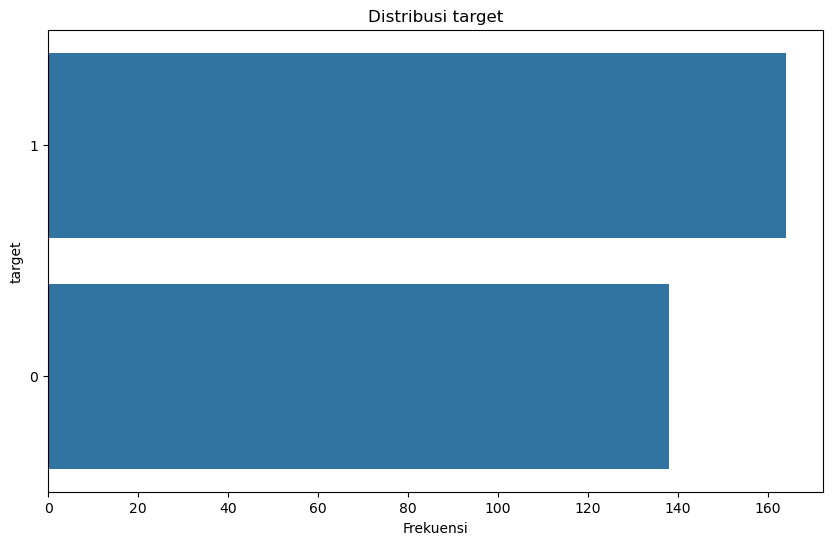

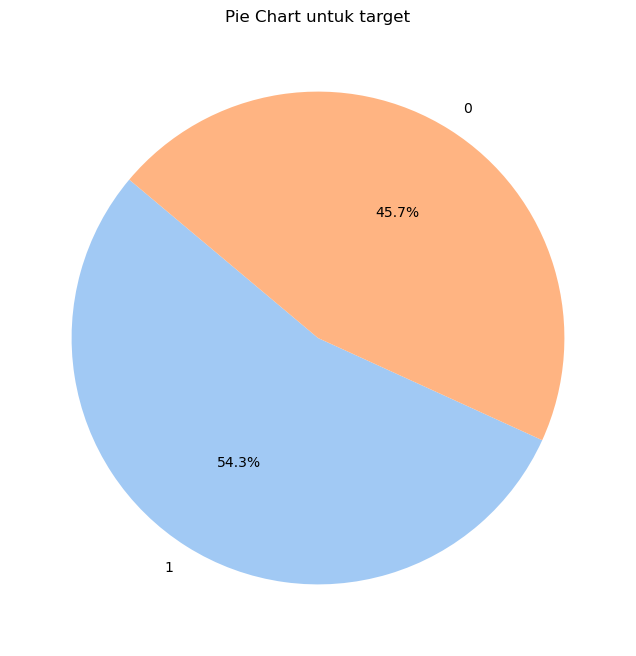

Banyaknya data: 
 target
1    164
0    138
Name: count, dtype: int64

Nilai unik dari target: 2


In [12]:
# Plot Countplot untuk target
plt.figure(figsize=(10, 6))
sns.countplot(y=df['target'], order=df['target'].value_counts().index)
plt.title('Distribusi target')
plt.xlabel('Frekuensi')
plt.ylabel('target')
plt.show()

# Plot Pie chart target
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Pie Chart untuk target')
plt.show()

# Melihat banyaknya data target
print("Banyaknya data: \n",df['target'].value_counts())

# Melihat nilai unik dari target
print("")
print("Nilai unik dari target:", df['target'].nunique())

- Diketahui pada data bahwa 1 merupakan orang yang terkena serangan jantung dan 0 orang yang tidak terkena serangan jantung.
- Pada Dataset ini  mengatakan bahwa orang yang terkena serangan jantung lebih banyak dibandingkan orang yang tidak dengan perbandingan `165` (yes) dan `138` (no), persentase yang didapat sebesar `54.5%` dan `45.5%`.

### Numerikal

In [13]:
# Data Numerikal
numerical_cols = ['age','trestbps','chol','thalach','oldpeak']

# Inisialisasi dictionary untuk menyimpan hasil
stats = {
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Variance': [],
    'Std Dev': [],
    'Skew':[],
    'Range': [],
    'Min': [],
    'Max': []
}

for col in numerical_cols:
    stats['Mean'].append(df[col].mean())
    stats['Median'].append(df[col].median())
    stats['Mode'].append(df[col].mode()[0])
    stats['Variance'].append(df[col].var())
    stats['Skew'].append(df[col].skew())
    stats['Std Dev'].append(df[col].std())
    stats['Range'].append(df[col].max() - df[col].min())
    stats['Min'].append(df[col].min())
    stats['Max'].append(df[col].max())

# Konversi dictionary ke DataFrame
stats_df = pd.DataFrame(stats, index=numerical_cols)

# Menampilkan hasil
stats_df

,Mean,Median,Mode,Variance,Std Dev,Skew,Range,Min,Max
age,54.420530,55.5,58.0,81.865757,9.047970,-0.203743,48.0,29.0,77.0
trestbps,131.602649,130.0,120.0,308.472817,17.563394,0.716541,106.0,94.0,200.0
chol,246.500000,240.5,197.0,2678.423588,51.753489,1.147332,438.0,126.0,564.0
thalach,149.569536,152.5,162.0,524.571561,22.903527,-0.532671,131.0,71.0,202.0
oldpeak,1.043046,0.8,0.0,1.348971,1.161452,1.266173,6.2,0.0,6.2


- Usia (age) Skewness negatif (-0,202) menunjukkan sedikit kemiringan ke kiri, tetapi tidak signifikan.
Variansi dan standar deviasi yang rendah (82,48 dan 9,08) mengindikasikan bahwa penyebaran usia tidak terlalu besar, dengan rentang usia dari 29 hingga 77 tahun.
- Tekanan Darah Saat Istirahat (trestbps):Skewness positif (0,71) menunjukkan sedikit kemiringan ke kanan, mengindikasikan adanya nilai tekanan darah yang lebih tinggi dari rata-rata.
- Kolesterol (chol): skewness positif (1,14) menunjukkan distribusi yang cukup miring ke kanan, menandakan adanya beberapa individu dengan kadar kolesterol yang jauh lebih tinggi dari rata-rata.
- Detak Jantung Maksimum (thalach): Skewness negatif (-0,54) menunjukkan kemiringan ke kiri, yang menandakan beberapa individu memiliki detak jantung maksimum yang lebih rendah dari rata-rata.
- Depresi ST (oldpeak):Skewness positif (1,27) menunjukkan distribusi yang sangat miring ke kanan, yang berarti ada beberapa nilai yang jauh lebih tinggi dari nilai rata-rata.

Data menunjukkan variasi yang cukup signifikan dalam beberapa variabel kesehatan seperti kolesterol, tekanan darah, dan detak jantung maksimum. Terdapat kecenderungan distribusi data yang sedikit tidak simetris, terutama pada variabel tekanan darah, kolesterol, dan depresi ST yang menunjukkan skewness positif. Ini menunjukkan adanya beberapa nilai ekstrem yang lebih tinggi dari rata-rata pada variabel-variabel tersebut

hanya kolom `age` yang memiliki distribusi normal bernilai skew negatif.

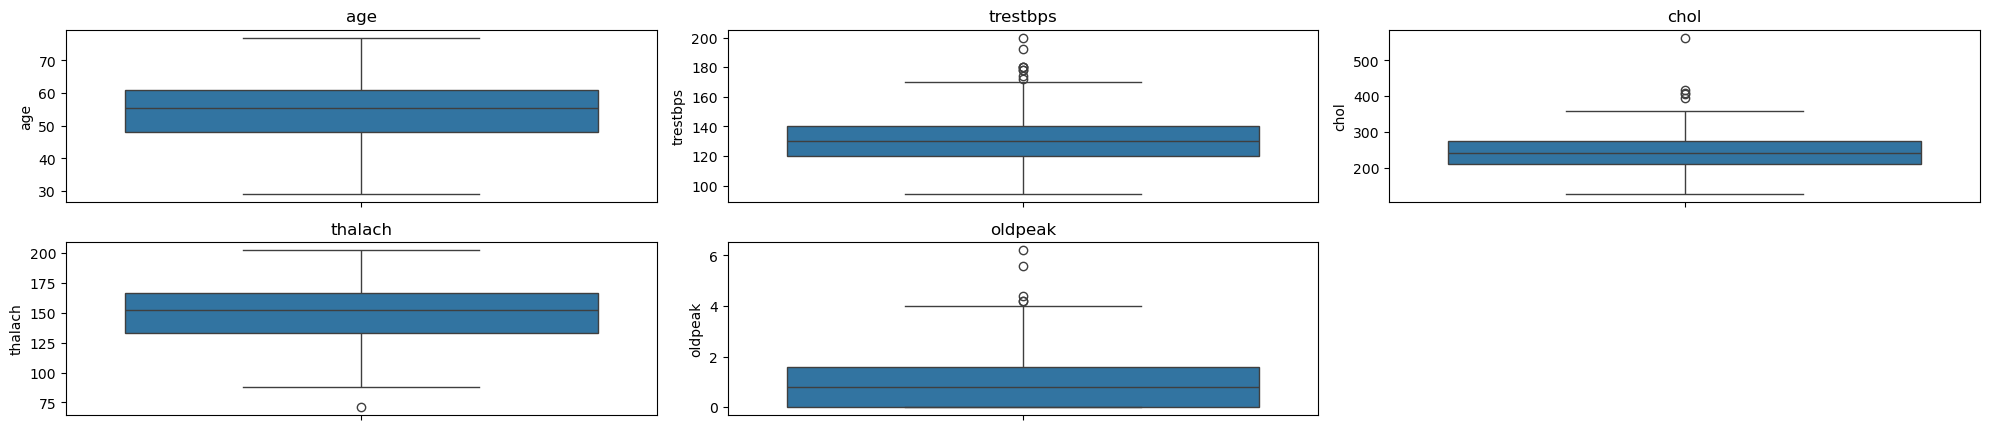

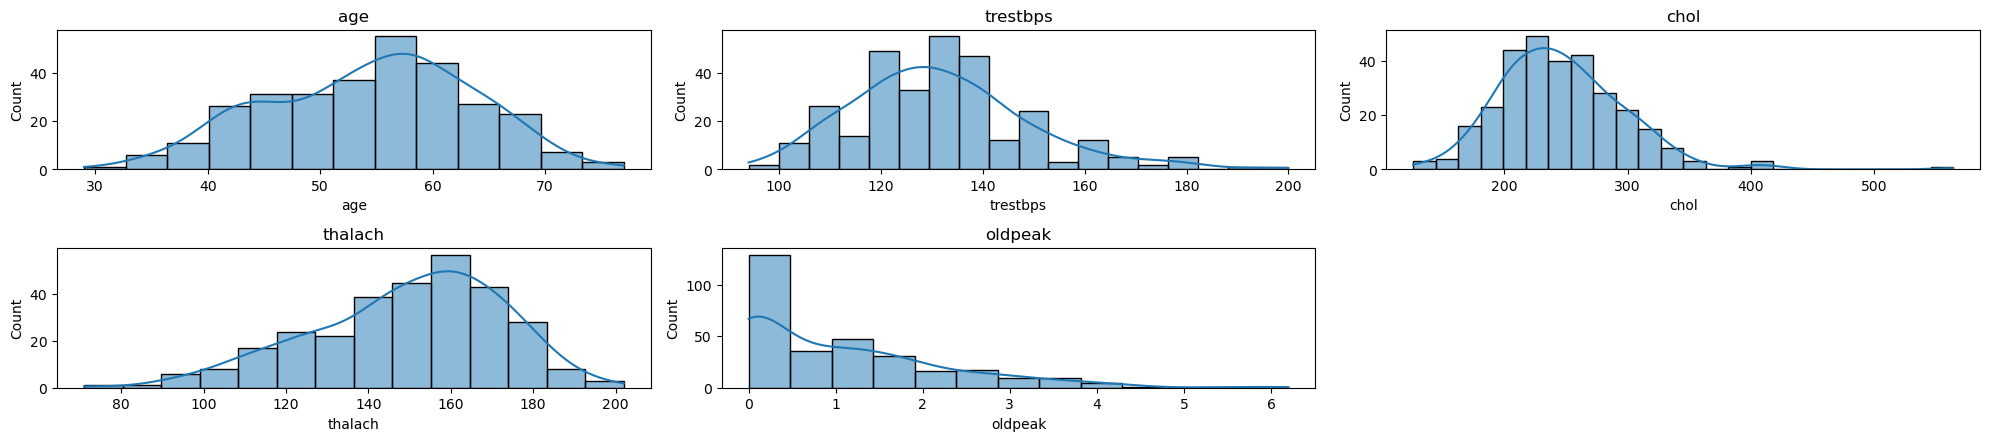

In [14]:
# Set up figure
plt.figure(figsize=(20, 15))

# Loop Boxplot terhadap numerical kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(7, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

# Layout
plt.tight_layout()
plt.show()

# Set Up figure
plt.figure(figsize=(20, 15))

# Loop Histogram terhadap numerical kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(7, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

# Layout
plt.tight_layout()
plt.show()

- Pada visual boxplot, terdapat kolom oldpeak dengan chol yang mungkin memiliki outlier, langkah selanjutnya akan di cek dulu apakah outlier ini karena pengaruh kesalahan atau nilai dari suatu pasien memang seperti itu.

#### Korelasi Numerikal
Pada tahap ini dilakukan uji korelasi kolom numerikal dengan target menggunakan uji korelasi kendalltau.

In [18]:
# Membuat DataFrame kosong untuk menyimpan hasil
correlation_results = pd.DataFrame(columns=['Feature', 'tau-correlation', 'p-value', 'korelasi'])

# Menghitung korelasi Kendalltau untuk setiap kolom numerikal dengan 'default_payment_next_month'
results = []
for col in numerical_cols:
    corr_tau, pval_k = stats.kendalltau(df[col], df['target'])
    korelasi = 'Yes' if pval_k < 0.05 else 'No'
    results.append({'Feature': col, 'tau-correlation': corr_tau, 'p-value': pval_k, 'korelasi': korelasi})

correlation_results = pd.DataFrame(results)

# Mengurutkan hasil korelasi dari tinggi ke rendah berdasarkan tau-correlation
correlation_results = correlation_results.sort_values(by='tau-correlation', ascending=True)

# Menampilkan tabel hasil
correlation_results

,Feature,tau-correlation,p-value,korelasi
4,oldpeak,-0.359998,3.330330e-13,Yes
0,age,-0.194922,4.613045e-05,Yes
1,trestbps,-0.103651,3.217278e-02,Yes
2,chol,-0.095948,4.235790e-02,Yes
3,thalach,0.350952,1.390777e-13,Yes


- Pada uji korelasi ini diketahui bahwa semua kolom numerikal memiliki korelasi dengan target.

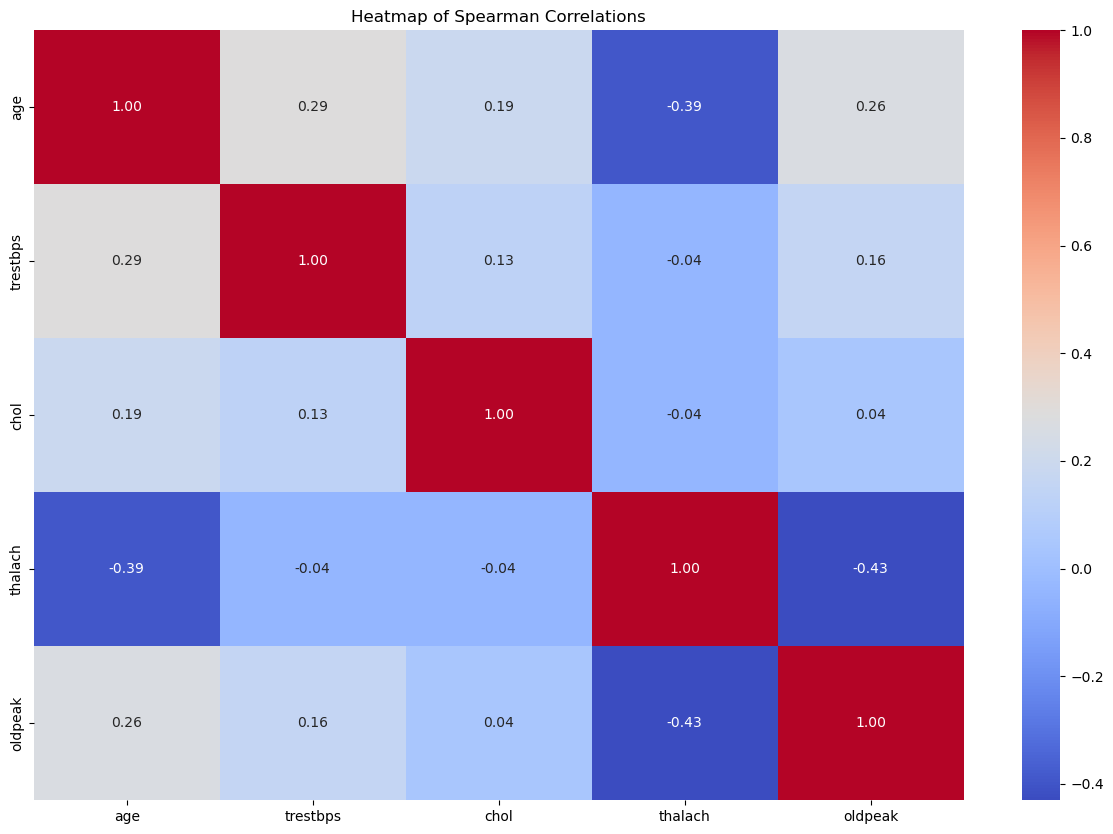

In [ ]:
# Subset DataFrame dengan hanya kolom numerikal
numerical_df = df[numerical_cols]

# Menghitung matriks korelasi menggunakan korelasi Pearson
correlation_matrix = numerical_df.corr(method='spearman')

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Spearman Correlations')
plt.show()

- Pada visual heatmap hubungan antara kolom tidak terlalu terlihat namun untuk kolom thalach dengan age sepertinya terdapat suatu hubungan yang bernilai negatif.

## Fitur Engineering

### Cek Kardinality 

In [ ]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[Male, Female]"
1,slope,3,"[Downsloping, Upsloping, Flat]"
2,thal,3,"[Fixed defect, Normal, Reversible defect, nan]"


Kardinality sudah bagus tidak ada data yang kardinalitas tinggi. data banyak yang memiliki n_unique dibawah 5. Lanjut ke Proses Splitting Target dan Fitur 

### Split Target dan Fitur
Pada tahap ini dilakukan split feature X dengan target y

In [ ]:
#splitting antara target dan fitur kolom 
X= df.drop(['target'], axis = 1 )
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect


sudah terbagi antara target dan fitur

### Split Train and Test Set
Pada tahap ini dilakukan split data train dan test

In [ ]:
# split antara test dan training data 
# penggunaan test size 20% 
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.2, random_state = 20)

print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (241, 13)
Test Size (61, 13)


### Cek Missing Value

In [ ]:
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        1
dtype: int64

In [ ]:
X_train.fillna({'ca': 0},inplace=True)
X_test.fillna({'ca': 0},inplace=True)
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        1
dtype: int64

In [ ]:
# isi missing value dengan modus
X_train['thal'].fillna(X_train['thal'].mode()[0], inplace=True)
X_test['thal'].fillna(X_test['thal'].mode()[0], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_7996\3709654794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['thal'].fillna(X_train['thal'].mode()[0], inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_7996\3709654794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [ ]:
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

###  Split numerical and categorical column
Pada tahap ini dilakukan split antara kategori dengan numerikal

In [ ]:
# Split data kategorikal dan numerikal
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_columns= ['sex', 'cp', 'restecg','exang', 'slope', 'ca', 'thal']

print('Numeric Columns: ', num_columns)
print('Categorical Nominal Columns: ', cat_columns)

Numeric Columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical Nominal Columns:  ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [ ]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,trestbps,chol,thalach,oldpeak
198,62,120,267,99,1.8
0,63,145,233,150,2.3
266,55,180,327,117,3.4
24,40,140,199,178,1.4
292,58,170,225,146,2.8
...,...,...,...,...,...
71,51,94,227,154,0.0
279,61,138,166,125,3.6
219,48,130,256,150,0.0
224,54,110,239,126,2.8


In [ ]:
X_train_cat

,sex,cp,restecg,exang,slope,ca,thal
198,Male,0,1,1,Flat,2.0,Reversible defect
0,Male,3,0,0,Downsloping,0.0,Fixed defect
266,Female,0,2,1,Flat,0.0,Normal
24,Male,3,1,1,Upsloping,0.0,Reversible defect
292,Female,0,0,1,Flat,2.0,Fixed defect
...,...,...,...,...,...,...,...
71,Male,2,1,1,Upsloping,1.0,Reversible defect
279,Male,0,0,1,Flat,1.0,Normal
219,Male,0,0,1,Upsloping,2.0,Reversible defect
224,Male,0,1,1,Flat,1.0,Reversible defect


### Handling Outlier
Pada tahap ini akan dilakukan pengecekan terhadap outlier.

In [ ]:
# Check Outlier di kolom numerikal
for col in numerical_cols:
    # Tukey's Rule
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    up_bound = q3 + 1.5 * iqr
    low_bound = q1 - 1.5 * iqr

    print(f'Column: {col}')
    print(f'Upper Boundary: {up_bound}')
    print(f'Lower Boundary: {low_bound}')

    # Filter data outlier dan simpan variabel outlier
    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]
    no_outlier = df[col][(df[col] >= low_bound) & (df[col] <= up_bound)]

    print(f'Percentage of outliers for {col}: {len(outlier) * 100 / len(df[col]):.2f}%')
    print("\n")

Column: age
Upper Boundary: 80.5
Lower Boundary: 28.5
Percentage of outliers for age: 0.00%


Column: trestbps
Upper Boundary: 170.0
Lower Boundary: 90.0
Percentage of outliers for trestbps: 2.98%


Column: chol
Upper Boundary: 370.375
Lower Boundary: 115.375
Percentage of outliers for chol: 1.66%


Column: thalach
Upper Boundary: 215.125
Lower Boundary: 84.125
Percentage of outliers for thalach: 0.33%


Column: oldpeak
Upper Boundary: 4.0
Lower Boundary: -2.4000000000000004
Percentage of outliers for oldpeak: 1.66%




Diketahui bahwa persentase outlier di kolom numerikal ini tidak terlalu besar masih di bawah 5% maka dari itu tahap handling outlier ini tidak akan dilakukan.

### Feature Selection

In [ ]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,sex,ada korelasi
1,cp,ada korelasi
2,restecg,ada korelasi
3,exang,ada korelasi
4,slope,ada korelasi
5,ca,ada korelasi
6,thal,ada korelasi


In [ ]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,age,ada korelasi
1,trestbps,ada korelasi
2,chol,ga ada korelasi
3,thalach,ada korelasi
4,oldpeak,ada korelasi


In [ ]:
X_train_num.drop('chol',axis=1,inplace=True)
X_test_num.drop('chol',axis=1,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_7996\2494088310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num.drop('chol',axis=1,inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_7996\2494088310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num.drop('chol',axis=1,inplace=True)


In [ ]:
X_train_num.columns

Index(['age', 'trestbps', 'thalach', 'oldpeak'], dtype='object')

### Scaling
Pada tahap ini dilakukan scalling pada data numerikal

In [ ]:
#Feature Scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.65116279, 0.30232558, 0.22764228, 0.29032258],
       [0.6744186 , 0.59302326, 0.64227642, 0.37096774],
       [0.48837209, 1.        , 0.37398374, 0.5483871 ],
       [0.13953488, 0.53488372, 0.8699187 , 0.22580645],
       [0.55813953, 0.88372093, 0.6097561 , 0.4516129 ],
       [0.60465116, 0.53488372, 0.80487805, 0.19354839],
       [0.62790698, 0.65116279, 0.53658537, 0.16129032],
       [0.46511628, 0.36046512, 0.65853659, 0.08064516],
       [0.53488372, 0.53488372, 0.42276423, 0.03225806],
       [0.18604651, 0.30232558, 0.7398374 , 0.        ],
       [0.30232558, 0.1627907 , 0.65853659, 0.        ],
       [0.18604651, 0.09302326, 0.41463415, 0.09677419],
       [0.74418605, 0.76744186, 0.39837398, 0.        ],
       [0.62790698, 0.30232558, 0.56097561, 0.58064516],
       [0.37209302, 0.40697674, 0.74796748, 0.        ],
       [0.69767442, 0.41860465, 0.41463415, 0.32258065],
       [0.76744186, 0.30232558, 0.47154472, 0.41935484],
       [0.37209302, 0.58139535,

Pada tahap scalling menggunakan MinMaxScaler dikarenakan distribusi dari kolom numerikal ini adalah skew/tidak normal. Maka dari itu digunakan scalling MinMaxScaller

### Feature Encoding

In [ ]:
# Proses Encoder
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

OneHotEncoder()

In [ ]:
X_train_encoded = encoder.transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

In [ ]:
#Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_encoded], axis = 1)

X_train_final.shape

(241, 25)

## Model Definition

Pada tahap ini model yang digunakan ialah DecisionTree dengan RandomForest

In [ ]:
# Model Decision Tree
model_dt = DecisionTreeClassifier()

# Model Random Forest
model_rf = RandomForestClassifier()

## Model Training
Pada tahap ini dilakukan model training setiap data

In [ ]:
# Training model Decision Tree
model_dt.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [ ]:
# Training model Random Forest
model_rf.fit(X_train_final,y_train)

RandomForestClassifier()

## Model Evaluation
Pada tahap ini dilakukan prediksi dengan model yang telah kita buat

In [ ]:
# Predik data train dan test Logistic Regression
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

# Predik data train dan test KNN
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)


### Decision Tree

In [ ]:
# Check the accuracy of model Decision Tree
print('Report Train Decision Tree: \n', classification_report(y_train, y_pred_train_dt))
print('Report Test Decision Tree: \n', classification_report(y_test, y_pred_test_dt))

Report Train Decision Tree: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       126

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Report Test Decision Tree: 
               precision    recall  f1-score   support

           0       0.59      0.83      0.69        23
           1       0.86      0.66      0.75        38

    accuracy                           0.72        61
   macro avg       0.73      0.74      0.72        61
weighted avg       0.76      0.72      0.73        61



Confusion Matrix Train Decistion Tree: 
 [[115   0]
 [  0 126]]


Confusion Matrix Test Decistion Tree: 
 [[19  4]
 [13 25]]


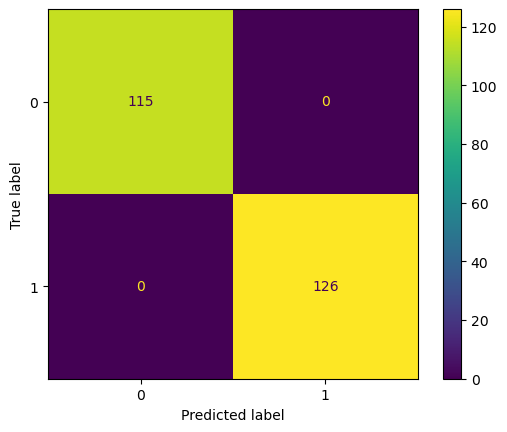

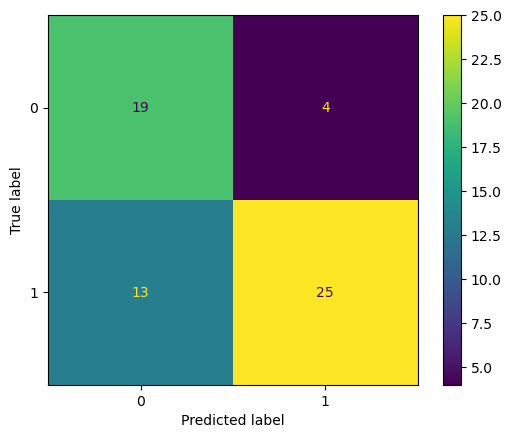

In [ ]:
# Membuat Confusion Matrix untuk model Decistion Tree
cm_train = confusion_matrix(y_train, y_pred_train_dt)
print('Confusion Matrix Train Decistion Tree: \n', cm_train)
ConfusionMatrixDisplay(cm_train).plot()
print('\n')

cm_test = confusion_matrix(y_test, y_pred_test_dt)
print('Confusion Matrix Test Decistion Tree: \n', cm_test)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- Pada model decision tree ini model yang didapatkan overfit dikarenakan data train memiliki akurasi 100% sedangkan pada data test acuraccy pada f1_score hanya 80%.
- Pada confusion metriks `data train` didapatkan nilai 0 pada false negative dan false positif yang artinya model dapat memprediksi dengan 100% tentang true positif dan true negatif.
- Ciri pasien false negative ini ialah pasien yang terdeteksi tidak terkena serangan jantung namun di prediksi terkena serangan jantung.
- Namun pada data test set model decision tree hanya memiliki accuracy pada f1_score sebesar 80% maka dari itu model dapat menebak false negatif dan false positve. Namun persentase yang didapatkan tidak begitu besar.

###  Random Forest

In [ ]:
# Check the accuracy of model Random Forest
print('Report Train Random Forest: \n', classification_report(y_train, y_pred_train_rf))
print('Report Test Random Forest: \n', classification_report(y_test, y_pred_test_rf))

Report Train Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       126

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Report Test Random Forest: 
               precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.90      0.74      0.81        38

    accuracy                           0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.81      0.79      0.79        61



Confusion Matrix Train Random Forest Tree: 
 [[115   0]
 [  0 126]]


Confusion Matrix Test Random Forest Tree: 
 [[20  3]
 [10 28]]


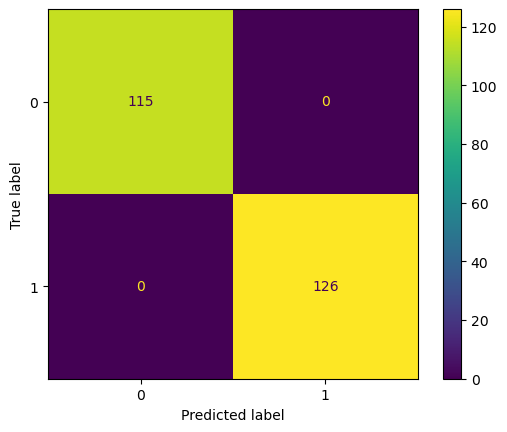

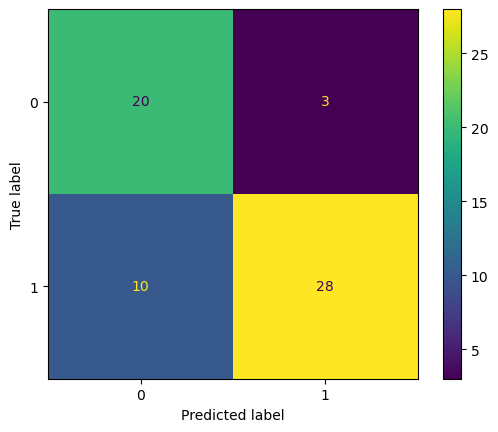

In [ ]:
# Membuat Confusion Matrix untuk model Random Forest Tree
cm_train = confusion_matrix(y_train, y_pred_train_rf)
print('Confusion Matrix Train Random Forest Tree: \n', cm_train)
ConfusionMatrixDisplay(cm_train).plot()
print('\n')

cm_test = confusion_matrix(y_test, y_pred_test_rf)
print('Confusion Matrix Test Random Forest Tree: \n', cm_test)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- pada model random forest ini model yang didapatkan overfit dikarenakan data train memiliki akurasi 100% sedangkan pada data test acuraccy pada f1_score hanya 83%.
- Pada confusion metriks `data train` didapatkan nilai 0 pada false negative dan false positif yang artinya model dapat memprediksi dengan 100% tentang true positif dan true negatif.
- Ciri pasien false negative ini ialah pasien yang terdeteksi tidak terkena serangan jantung namun di prediksi terkena serangan jantung.
- Namun pada `data test` set model random forest hanya memiliki accuracy pada f1_score sebesar 80% maka dari itu model dapat menebak false negatif dan false positve. Namun persentase yang didapatkan tidak begitu besar.
- Tambahan. Jika dibandingkan model base dari random forest lebih baik dibandingkan decision tree. Maka dari itu perlu dilakukan hyperparameter tuning untuk mendapatkan hasil yang bagus.

### Hyperparameter Tuning Best Model (Random Forest)

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators' : np.arange(200,401, 100),
    'max_depth' : np.arange(4,8,2)
}

# Inisiasi GridSearch terhadap model SVM
grid_search = GridSearchCV(model_rf, param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit model dari GridSearch terhadap data
grid_search.fit(X_train_final, y_train)

# Best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
print(f"Best parameters found: {best_params}")
print(f"Best estimator found: {best_model} \n")

Best parameters found: {'max_depth': 4, 'n_estimators': 200}
Best estimator found: RandomForestClassifier(max_depth=4, n_estimators=200) 



In [ ]:
# Evaluate the best model on the test set
y_pred_best_test = best_model.predict(X_test_final)
f1_test = f1_score(y_test, y_pred_best_test, average='weighted')
print(f'F1-score Test Set: {f1_test}')

# Evaluate the best model on the train set
y_pred_best_train = best_model.predict(X_train_final)
f1_train = f1_score(y_train, y_pred_best_train, average='weighted')
print(f'F1-score Train Set: {f1_train}\n')


# Classification report test set
print('Report test set best model: \n',classification_report(y_test, y_pred_best_test))
print('Report Test rf: \n',classification_report(y_test, y_pred_test_rf))

# Confusion matrix test set
conf_matrix_test = confusion_matrix(y_test, y_pred_best_test)
print(f'Confusion Matrix:\n{conf_matrix_test}\n')


# Classification report train set
print('Report train set best model: \n',classification_report(y_train, y_pred_best_train))
print('Report Train rf: \n',classification_report(y_train, y_pred_train_rf))

# Confusion matrix train set
conf_matrix_train = confusion_matrix(y_train, y_pred_best_train)
print(f'Confusion Matrix:\n{conf_matrix_train}')

F1-score Test Set: 0.8384975680057647
F1-score Train Set: 0.9083811092458268

Report test set best model: 
               precision    recall  f1-score   support

           0       0.72      0.91      0.81        23
           1       0.94      0.79      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.85      0.83        61
weighted avg       0.86      0.84      0.84        61

Report Test rf: 
               precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.90      0.74      0.81        38

    accuracy                           0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.81      0.79      0.79        61

Confusion Matrix:
[[21  2]
 [ 8 30]]

Report train set best model: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       115
           1       0.88      0.95      0.9

- Pada data test set data untuk randomforest setelah dilakukan hyperparameter tuning didapatkan bahwa nilai accuracy dari f1_score dari base model `83%` menjadi `87%` kenaikan ini cukup baik untuk dapat menebak data dengan cukup akurat.